# # Music Recommendation System
# ## Importing Libraries
# ## Data loading

In [2]:
import pandas as pd

file_path = '/Users/taief/Desktop/MUSIC REC/data/data_by_artist.csv'
data_by_artist = pd.read_csv(file_path)
data_by_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


# ## Data Cleaning

In [6]:
#check for missing values
print(data_by_artist.isnull().sum())
#check for duplicates
duplicates = data_by_artist.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# check missing rows
missing_rows = data_by_artist.isnull().sum()
print(f"Number of missing rows: {missing_rows.sum()}")

mode                0
count               0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
Number of duplicate rows: 0
Number of missing rows: 0


# ## Data Preprocessing and Feature Engineering
# ### Feature Scaling

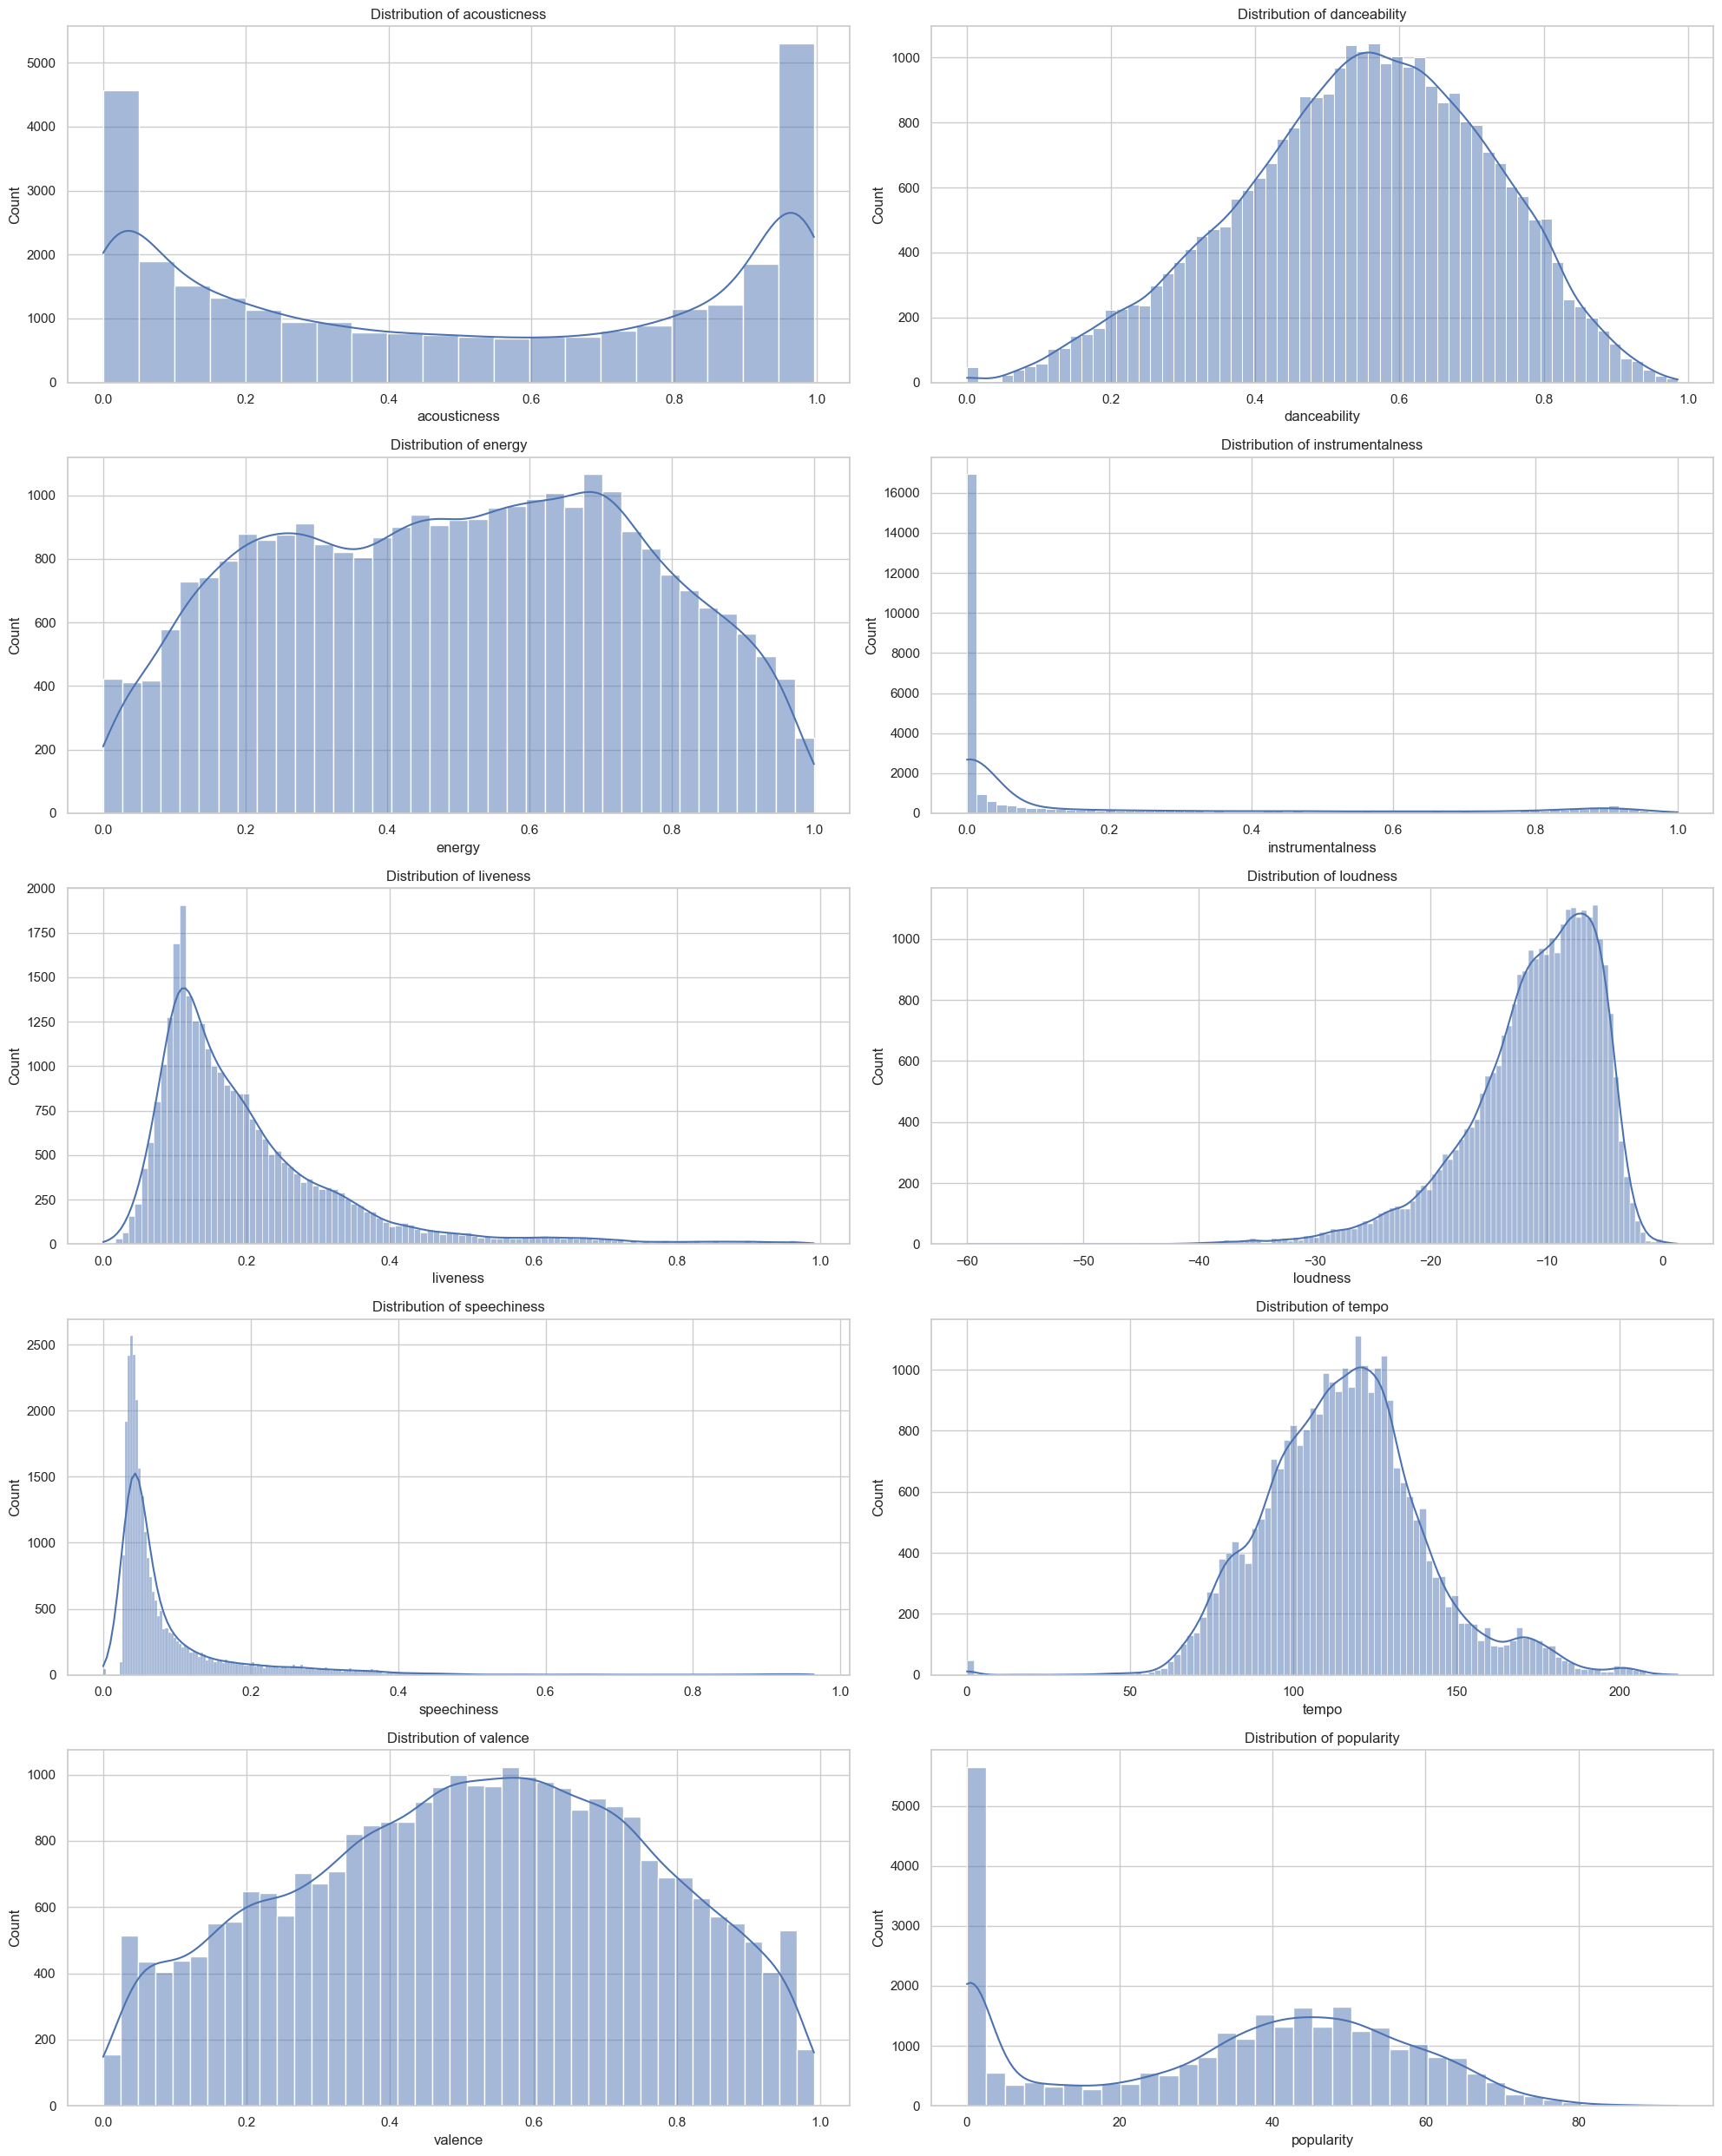

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visual style for plots
sns.set(style="whitegrid")

# List of features to plot
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Plotting distributions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for i, feature in enumerate(features):
    sns.histplot(data=data_by_artist[feature], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

# save plot in plot folder with name distribution_of_features.png
plt.savefig('plot/distribution_of_features.png')

# Relation between features and popularity

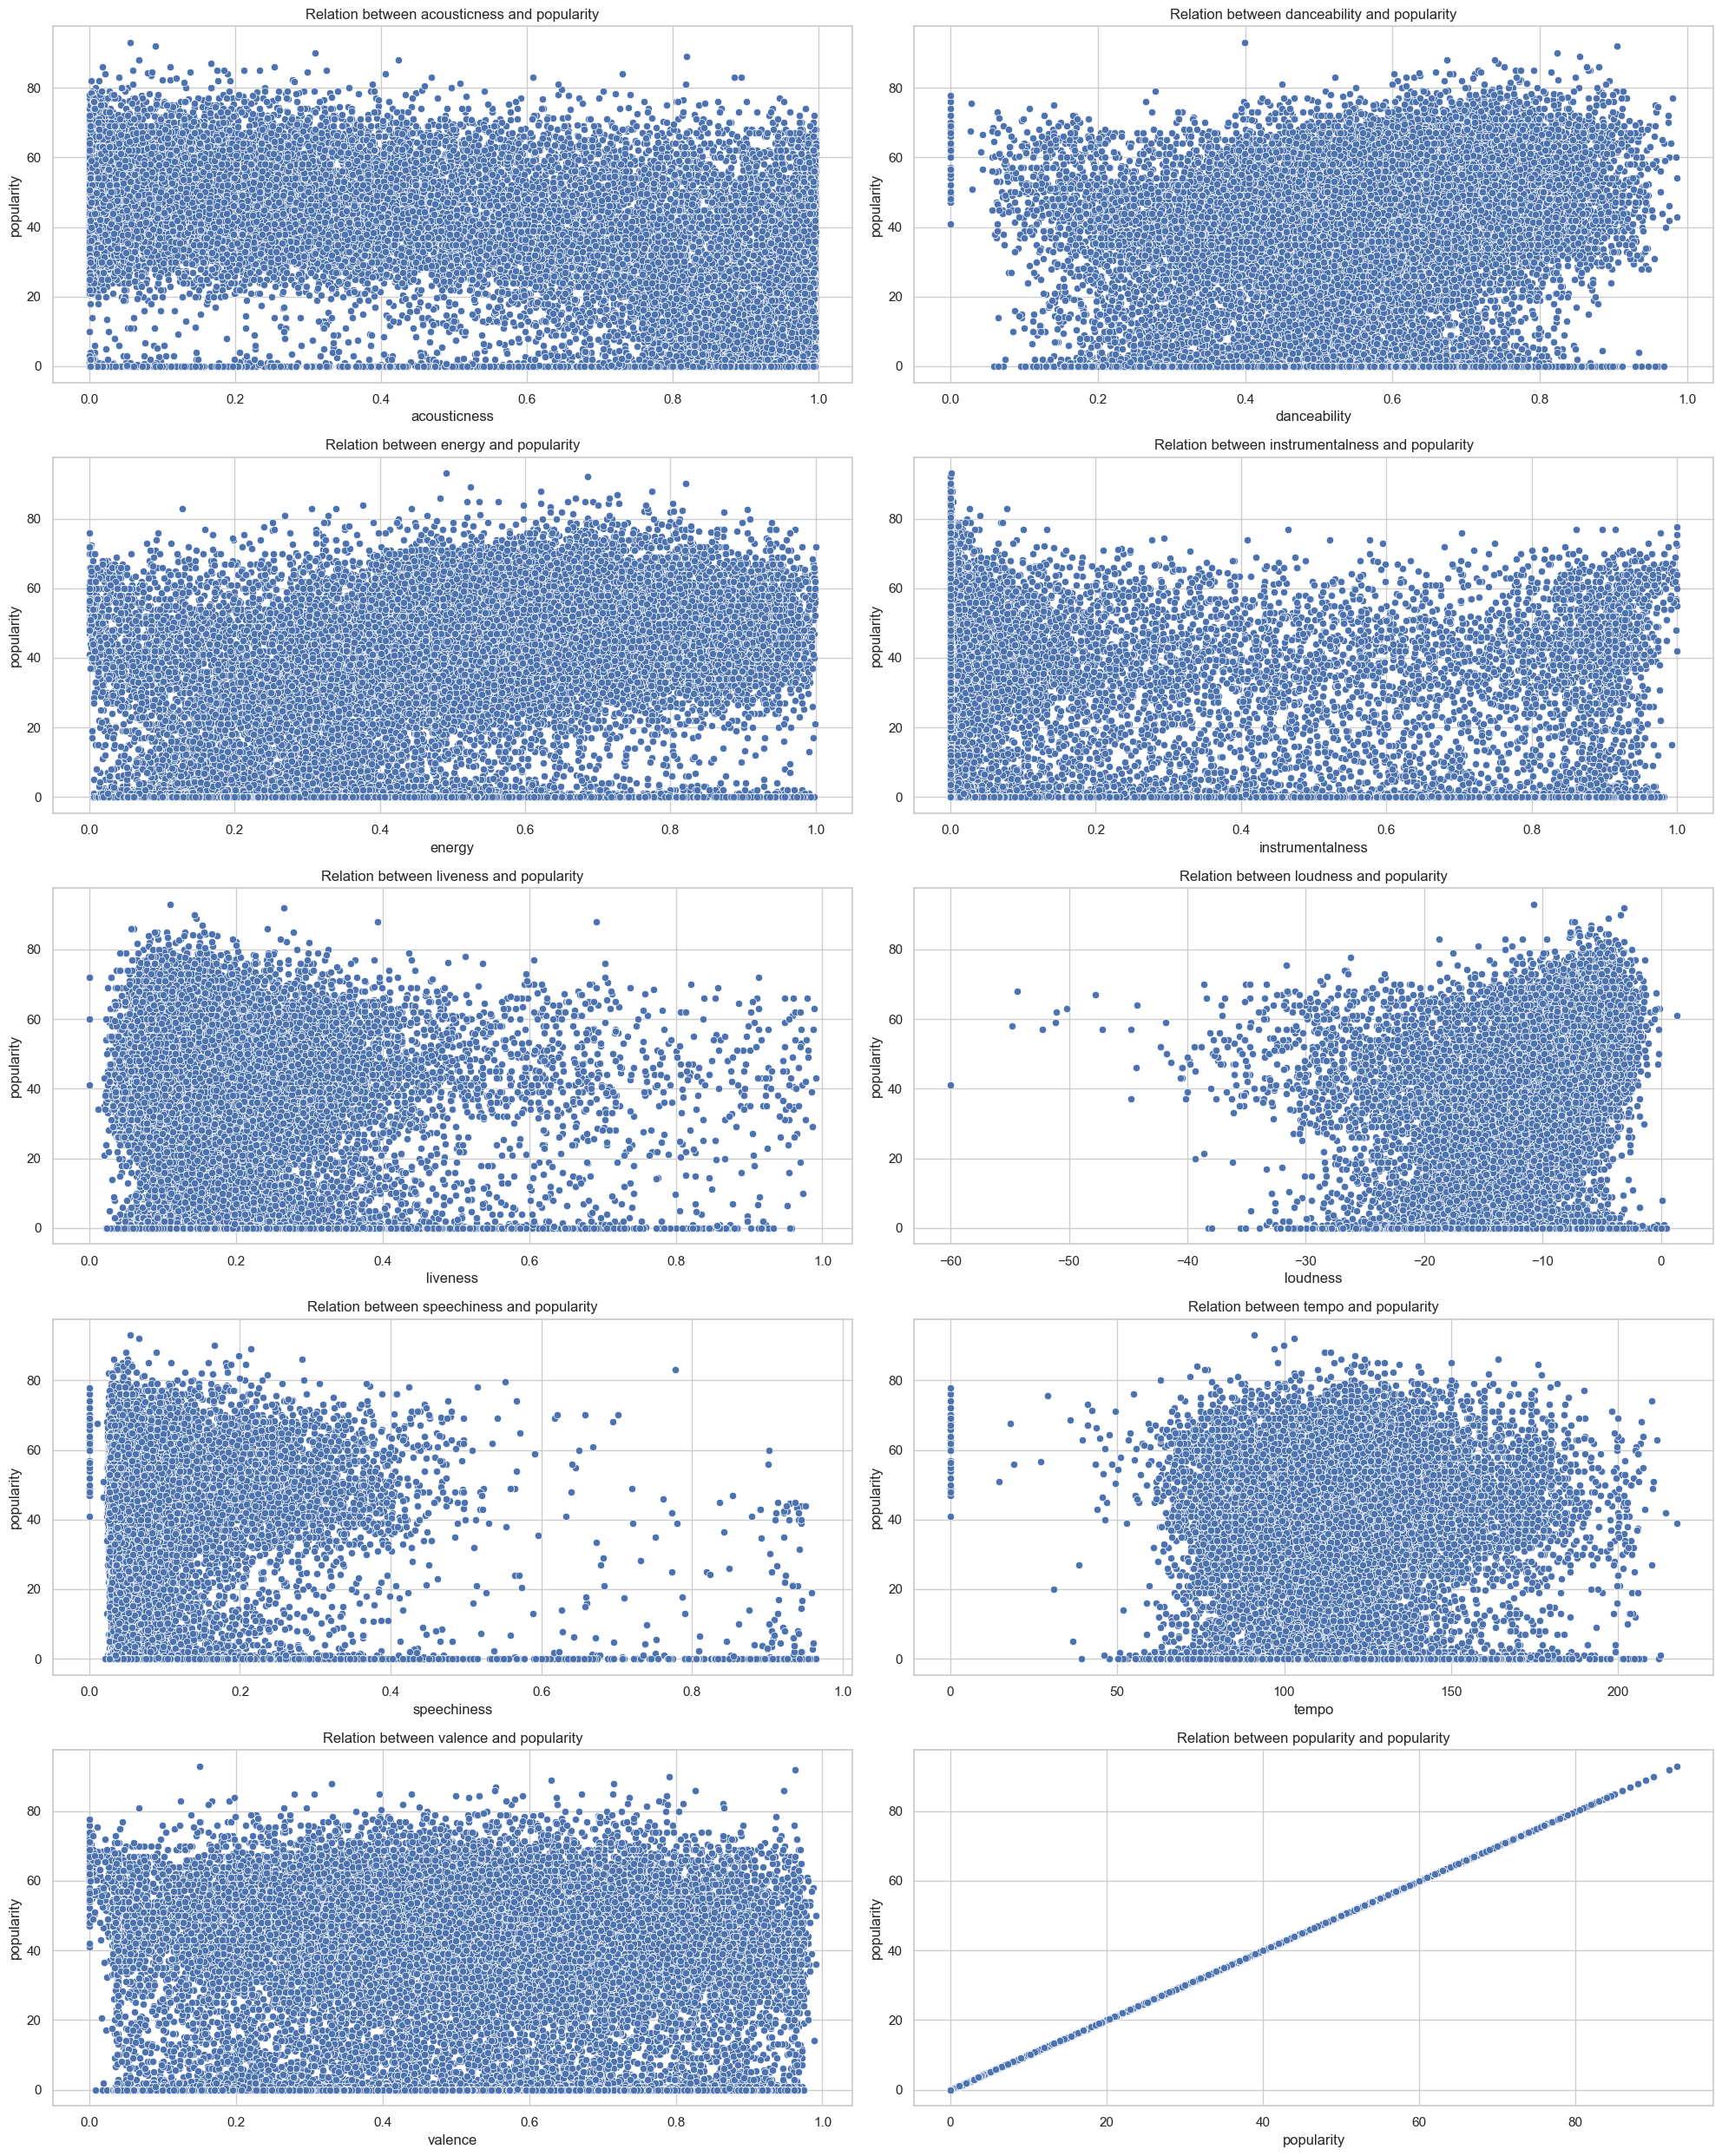

In [10]:
# Plotting relation between features and popularity
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for i, feature in enumerate(features):
    sns.scatterplot(data=data_by_artist, x=feature, y='popularity', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Relation between {feature} and popularity')
plt.tight_layout()
# save plot in plot folder with name relation_between_features_and_popularity.png
plt.savefig('plot/relation_between_features_and_popularity.png')

# clustering

Text(0.5, 1.0, 'Clusters of Artists')

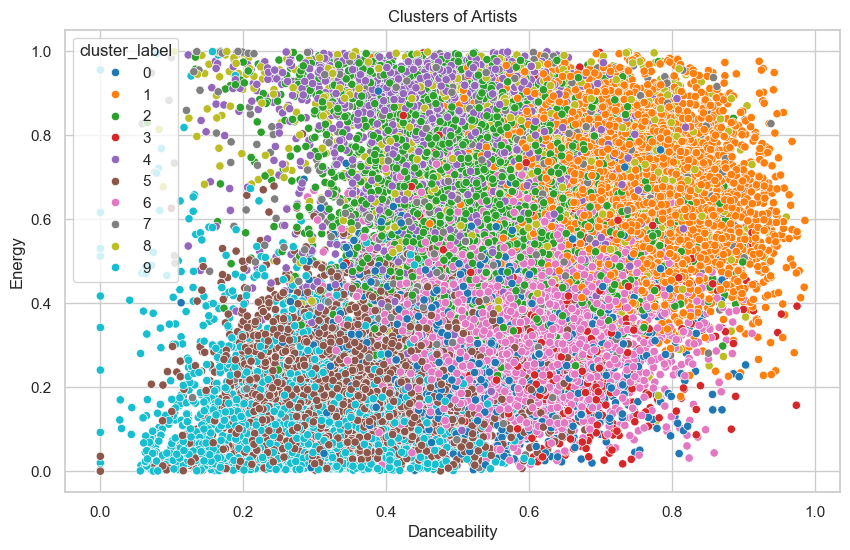

In [13]:
# clustering KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering (all available features)
features_for_clustering = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']

# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_by_artist[features_for_clustering])

# Applying K-Means Clustering to the dataset

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original DataFrame
data_by_artist['cluster_label'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_by_artist, x='danceability', y='energy', hue='cluster_label', palette='tab10')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusters of Artists')




In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
